# **FINAL REQUIREMENT IN ADVANCED MACHINE LEARNING**

Sleep is crucial for maintaining overall health and well-being, supporting the immune system, enhancing body function and memory, and reducing anxiety, stress, and depression. This analysis delves into key user attributes—Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, and Sleeping Disorder—to extract insights on sleep behaviors and characteristics. By understanding these attributes, the analysis aims to identify opportunities for businesses catering to sleep lifestyles, ultimately improving individual sleep health and overall well-being.

# **1. Importing Libraries**

Importing libraries in Python involves using the **IMPORT** statement to include external modules or packages that provide additional functionality and tools. This allows you to reuse code written by others for tasks like data manipulation, web development, and scientific computing.

In [ ]:
#Reading data

import pandas as pd

import os

#Fixings warnings
import warnings
warnings.filterwarnings('ignore')

#For mathematical operations
import numpy as np
from scipy import stats

#Visualisation
import seaborn as sns
import plotly.express as px
from termcolor import colored
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import plotly.figure_factory as ff

#Data Preprocessing & Modeling
from pprint import pprint
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

# **2. Uploading Dataset**

Uploading a dataset in Python typically involves using libraries like **PANDAS or NUMPY** to read data from files such as CSV or Excel. This process allows you to load the data into a DataFrame or array for analysis and manipulation.

In [ ]:
df = pd.read_csv('sleephealthdataanalysis.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# **2. Data Cleaning and Pre-processing Segment**

Data cleaning and pre-processing in Python involve handling missing values, removing duplicates, and converting data types to ensure consistency and accuracy. Techniques such as normalization, scaling, and encoding categorical variables are also applied to prepare the data for analysis or machine learning models.

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.describe(include = 'number')

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64

In [ ]:
df.drop_duplicates()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
print(df['Occupation'].value_counts())
print('\n')
print(df['BMI Category'].value_counts())
print('\n')
print(df['Sleep Disorder'].value_counts())

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64


BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64


Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64


In [ ]:

df['BMI Category'] = df['BMI Category'].replace({'Normal weight': 'Normal Weight', 'Normal': 'Normal Weight'})


df[['BloodPressure_Systolic', 'BloodPressure_Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['BloodPressure_Systolic'] = pd.to_numeric(df['BloodPressure_Systolic'])
df['BloodPressure_Diastolic'] = pd.to_numeric(df['BloodPressure_Diastolic'])

columns = ['Age', 'Sleep Duration', 'Quality of Sleep',
           'Physical Activity Level', 'Stress Level',
           'Heart Rate', 'Daily Steps', 'BloodPressure_Systolic', 'BloodPressure_Diastolic']


z_scores = np.abs(stats.zscore(df[columns]))


z_scores_df = pd.DataFrame(z_scores, columns=columns)


df = df[(z_scores_df < 3).all(axis=1)]


df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BloodPressure_Systolic,BloodPressure_Diastolic
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,188.446575,42.263014,7.134521,7.334247,59.232877,5.380822,69.810959,6902.739726,128.293151,84.512329
std,107.675211,8.647993,0.794046,1.166405,20.827339,1.771311,3.500375,1540.494837,7.651695,6.170026
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3500.000000,115.000000,75.000000
25%,96.000000,36.000000,6.400000,6.000000,45.000000,4.000000,68.000000,6000.000000,125.000000,80.000000
50%,188.000000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,283.000000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,82.000000,10000.000000,140.000000,95.000000


In [ ]:
numerical_df = df.copy()


numerical_df.drop('Blood Pressure', axis=1, inplace=True)

label_encoder = preprocessing.LabelEncoder()
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for col in categorical_columns:
    numerical_df[col] = label_encoder.fit_transform(numerical_df[col])
numerical_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Systolic,BloodPressure_Diastolic
0,1,1,27,8,6.1,6,42,6,2,77,4200,1,126,83
1,2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,3,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
6,7,1,29,9,6.3,6,40,7,1,82,3500,0,140,90
7,8,1,29,1,7.8,7,75,6,0,70,8000,1,120,80


In [ ]:

columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']


z_scores = np.abs(stats.zscore(numerical_df[columns]))


z_scores_df = pd.DataFrame(z_scores, columns=columns)


numerical_df = numerical_df[(z_scores_df < 3).all(axis=1)]

numerical_df.describe()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure_Systolic,BloodPressure_Diastolic
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,188.446575,0.495890,42.263014,3.564384,7.134521,7.334247,59.232877,5.380822,0.813699,69.810959,6902.739726,0.994521,128.293151,84.512329
std,107.675211,0.500669,8.647993,2.727423,0.794046,1.166405,20.827339,1.771311,0.982444,3.500375,1540.494837,0.633300,7.651695,6.170026
min,1.000000,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3500.000000,0.000000,115.000000,75.000000
25%,96.000000,0.000000,36.000000,1.000000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,6000.000000,1.000000,125.000000,80.000000
50%,188.000000,0.000000,43.000000,3.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,1.000000,130.000000,85.000000
75%,283.000000,1.000000,50.000000,5.000000,7.800000,8.000000,75.000000,7.000000,2.000000,72.000000,8000.000000,1.000000,135.000000,90.000000
max,374.000000,1.000000,59.000000,9.000000,8.500000,9.000000,90.000000,8.000000,2.000000,82.000000,10000.000000,2.000000,140.000000,95.000000


# **4. Descriptive Statistics**

 Use of summary statistics to understand data distribution

        Person ID      Gender         Age  Occupation  Sleep Duration  \
count  365.000000  365.000000  365.000000  365.000000      365.000000   
mean   188.446575    0.495890   42.263014    3.564384        7.134521   
std    107.675211    0.500669    8.647993    2.727423        0.794046   
min      1.000000    0.000000   27.000000    0.000000        5.800000   
25%     96.000000    0.000000   36.000000    1.000000        6.400000   
50%    188.000000    0.000000   43.000000    3.000000        7.200000   
75%    283.000000    1.000000   50.000000    5.000000        7.800000   
max    374.000000    1.000000   59.000000    9.000000        8.500000   

       Quality of Sleep  Physical Activity Level  Stress Level  BMI Category  \
count        365.000000               365.000000    365.000000    365.000000   
mean           7.334247                59.232877      5.380822      0.813699   
std            1.166405                20.827339      1.771311      0.982444   
min            4.00000

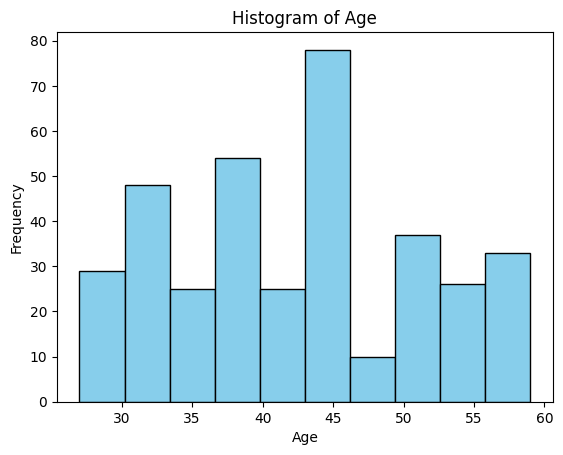

In [ ]:

summary_stats = numerical_df.describe()
print(summary_stats)

column_name = 'Age'
column_distribution = numerical_df[column_name].value_counts()
print(column_distribution)


plt.hist(numerical_df[column_name], bins=10, color='skyblue', edgecolor='black')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column_name)
plt.show()


# **5. Inferential Statistics**

(If applicable) Techniques used to make predictions or
inferences from the dat

In [ ]:
group1 = numerical_df[numerical_df['Gender'] == 0]['Sleep Duration']
group2 = numerical_df[numerical_df['Gender'] == 1]['Sleep Duration']
t_stat, p_value = stats.ttest_ind(group1, group2)
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 2.3006671537067134
P-value: 0.02197673801600147


# **6. Predictive Modeling**

If (applicable) Models built to predict future trends

In [ ]:

X = numerical_df.drop(columns=['Sleep Disorder'])
y = numerical_df['Sleep Disorder']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = GradientBoostingClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9178082191780822
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        19
           1       0.95      0.97      0.96        37
           2       0.80      0.94      0.86        17

    accuracy                           0.92        73
   macro avg       0.92      0.90      0.90        73
weighted avg       0.93      0.92      0.92        73



# **7. Machine Learning Implementation**

Linear Regression Model Evaluation
Mean Absolute Error (MAE): 0.22075306409171216
Mean Squared Error (MSE): 0.08157616625944596
R-squared (R²) Score: 0.8799621733425227


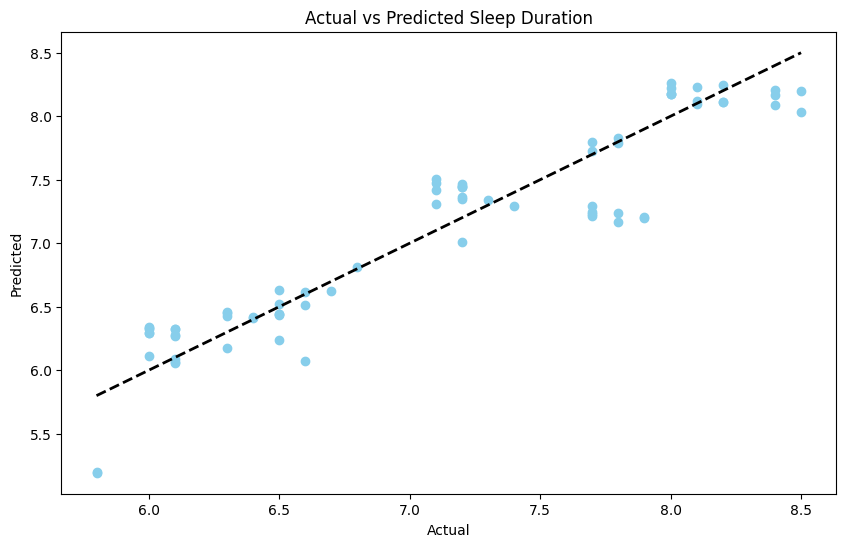

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = numerical_df.drop(columns=['Sleep Duration'])
y = numerical_df['Sleep Duration']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)


y_pred = lin_reg_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) Score:", r2)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sleep Duration')
plt.show()


# **8. Data Visualization Segment**

Data visualization in Python involves using libraries such as `matplotlib`, `seaborn`, and `plotly` to create graphical representations of data. This helps in identifying patterns, trends, and insights by transforming raw data into visual formats like charts, graphs, and plots.

<Figure size 1000x600 with 0 Axes>

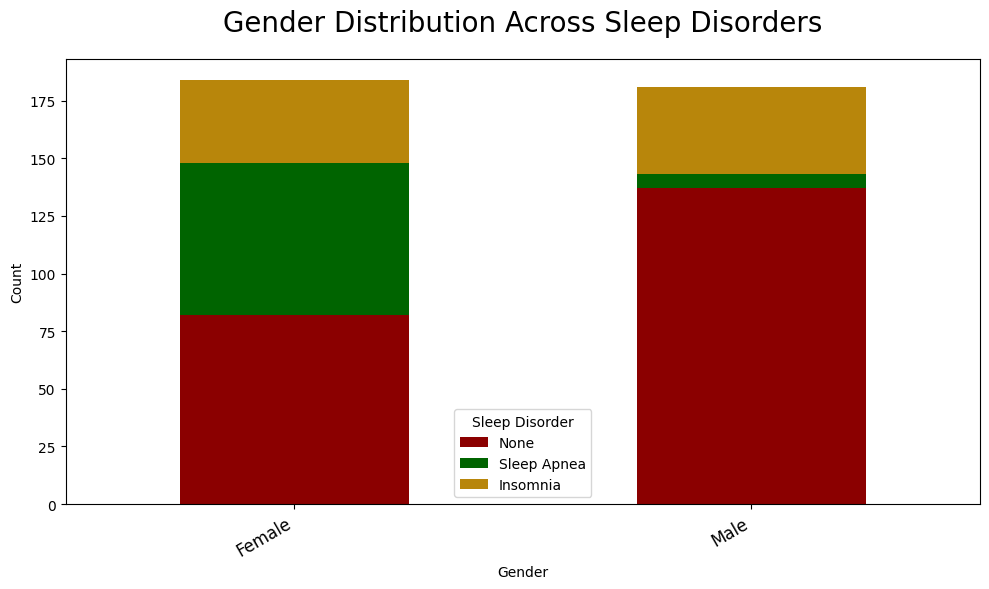

In [ ]:
sleep_disorder_gender = df.groupby(['Gender', 'Sleep Disorder']).size().unstack(fill_value=0)
sleep_disorder_order = ['None', 'Sleep Apnea', 'Insomnia']
sleep_disorder_gender = sleep_disorder_gender[sleep_disorder_order]

colors = ['#8B0000', '#006400', '#B8860B']

plt.figure(figsize=(10, 6))
sleep_disorder_gender.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))
plt.title('Gender Distribution Across Sleep Disorders', fontsize=20, pad=20)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

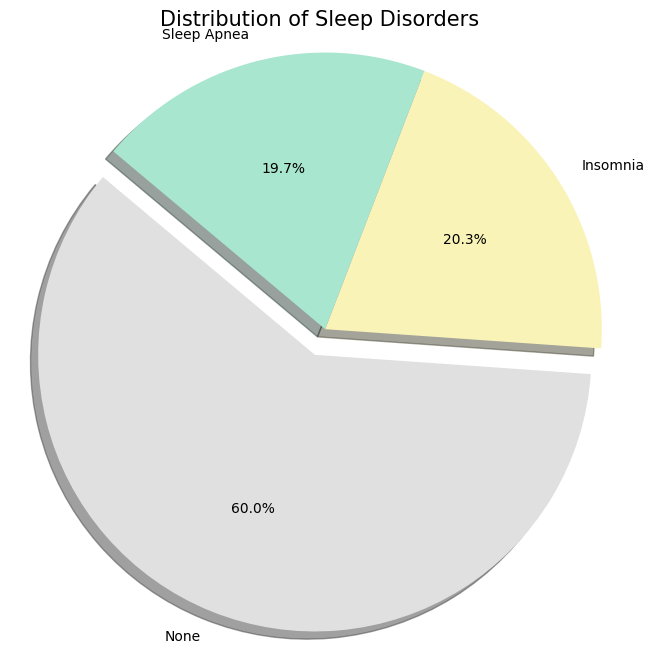

In [ ]:
df_disorder_distribution = df['Sleep Disorder'].value_counts()

labels = df_disorder_distribution.index
sizes = df_disorder_distribution.values
colors = ['#e0e0e0', '#faf3b7', '#a8e6cf']
explode = (0.1, 0, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Distribution of Sleep Disorders', fontsize=15)
plt.show()

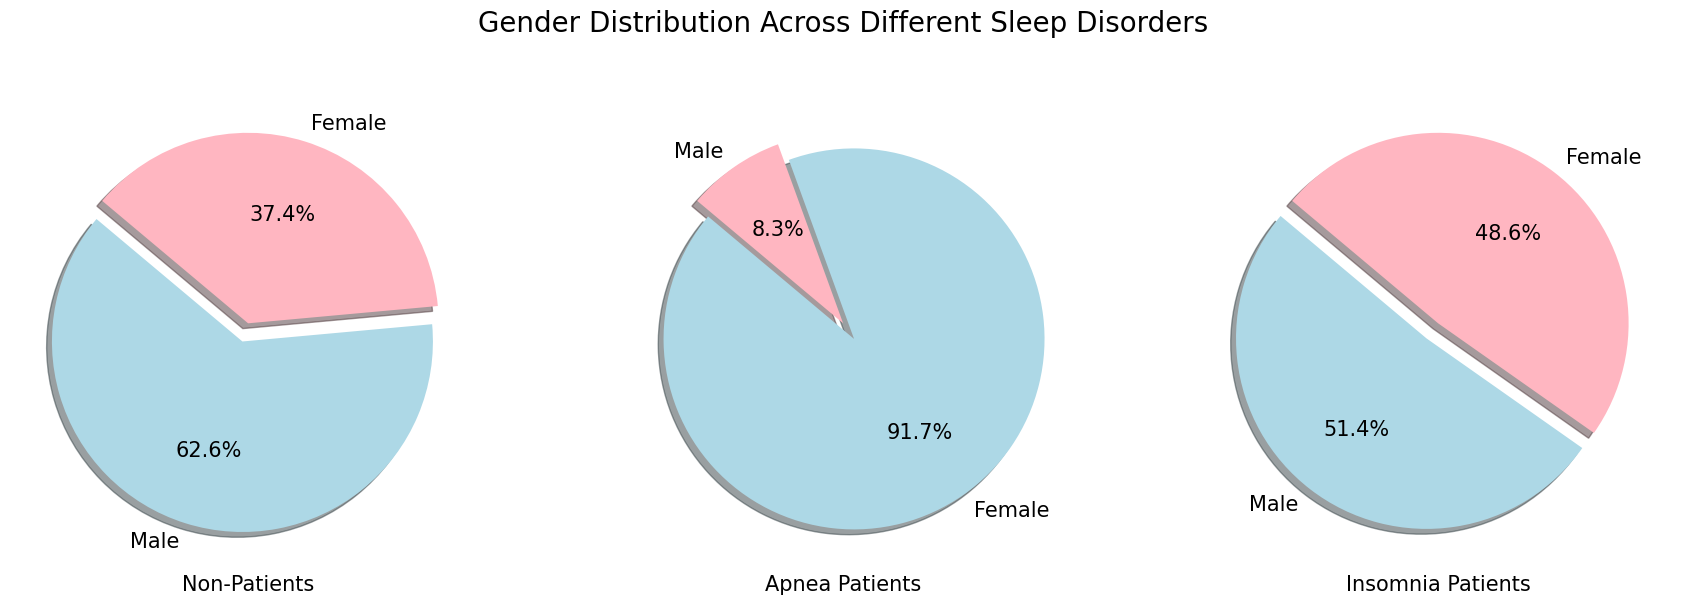

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = ['lightblue', 'lightpink']
explode = (0.1, 0)


df_non_patients = df[df['Sleep Disorder'] == 'None']['Gender'].value_counts()
wedges, texts, autotexts = axes[0].pie(df_non_patients.values,
                                       explode=explode,
                                       labels=df_non_patients.index,
                                       colors=colors,
                                       autopct='%1.1f%%',
                                       shadow=True,
                                       startangle=140,
                                       textprops={'color': 'black', 'fontsize': 15})
axes[0].text(0, -1.4, 'Non-Patients', ha='center', fontsize=15)


df_apnea = df[df['Sleep Disorder'] == 'Sleep Apnea']['Gender'].value_counts()
wedges, texts, autotexts = axes[1].pie(df_apnea.values,
                                       explode=explode,
                                       labels=df_apnea.index,
                                       colors=colors,
                                       autopct='%1.1f%%',
                                       shadow=True,
                                       startangle=140,
                                       textprops={'color': 'black', 'fontsize': 15})
axes[1].text(0, -1.4, 'Apnea Patients', ha='center', fontsize=15)


df_insomnia = df[df['Sleep Disorder'] == 'Insomnia']['Gender'].value_counts()
wedges, texts, autotexts = axes[2].pie(df_insomnia.values,
                                       explode=explode,
                                       labels=df_insomnia.index,
                                       colors=colors,
                                       autopct='%1.1f%%',
                                       shadow=True,
                                       startangle=140,
                                       textprops={'color': 'black', 'fontsize': 15})
axes[2].text(0, -1.4, 'Insomnia Patients', ha='center', fontsize=15)

fig.suptitle('Gender Distribution Across Different Sleep Disorders', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

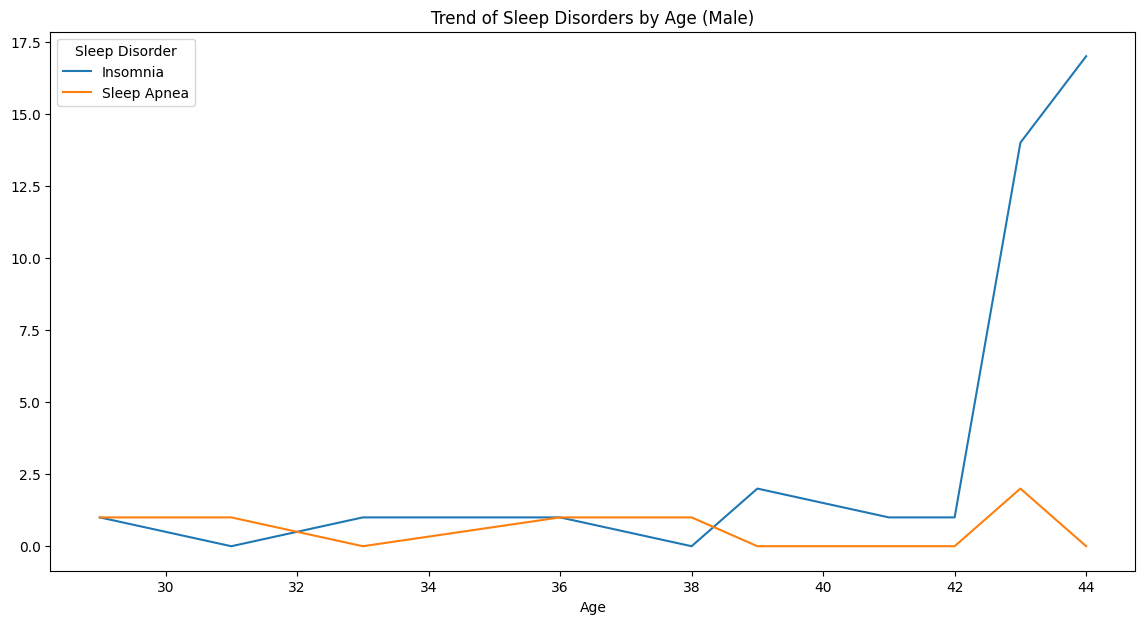

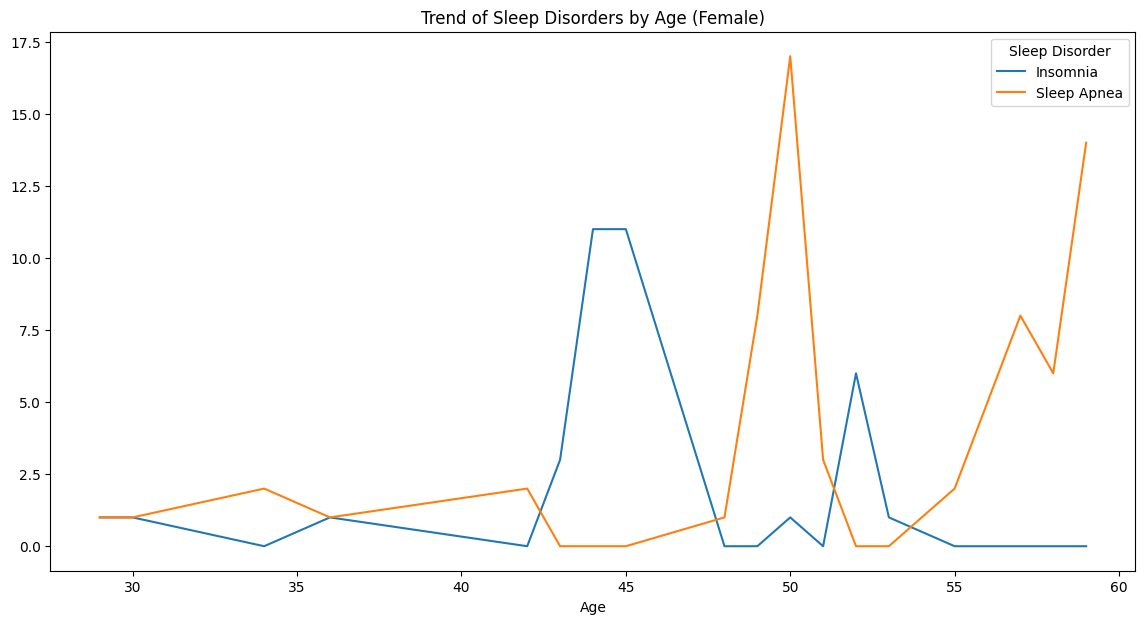

In [ ]:
male_age_disorder_counts = df[(df['Sleep Disorder'] != 'None') & (df['Gender'] == 'Male')].groupby(['Age', 'Sleep Disorder']).size().unstack(fill_value=0)
female_age_disorder_counts = df[(df['Sleep Disorder'] != 'None') & (df['Gender'] == 'Female')].groupby(['Age', 'Sleep Disorder']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
for disorder in male_age_disorder_counts.columns:
    plt.plot(male_age_disorder_counts.index, male_age_disorder_counts[disorder], label=disorder)
plt.title('Trend of Sleep Disorders by Age (Male)')
plt.xlabel('Age')
plt.ylabel('')
plt.legend(title='Sleep Disorder')
plt.show()

plt.figure(figsize=(14, 7))
for disorder in female_age_disorder_counts.columns:
    plt.plot(female_age_disorder_counts.index, female_age_disorder_counts[disorder], label=disorder)
plt.title('Trend of Sleep Disorders by Age (Female)')
plt.xlabel('Age')
plt.ylabel('')
plt.legend(title='Sleep Disorder')
plt.show()

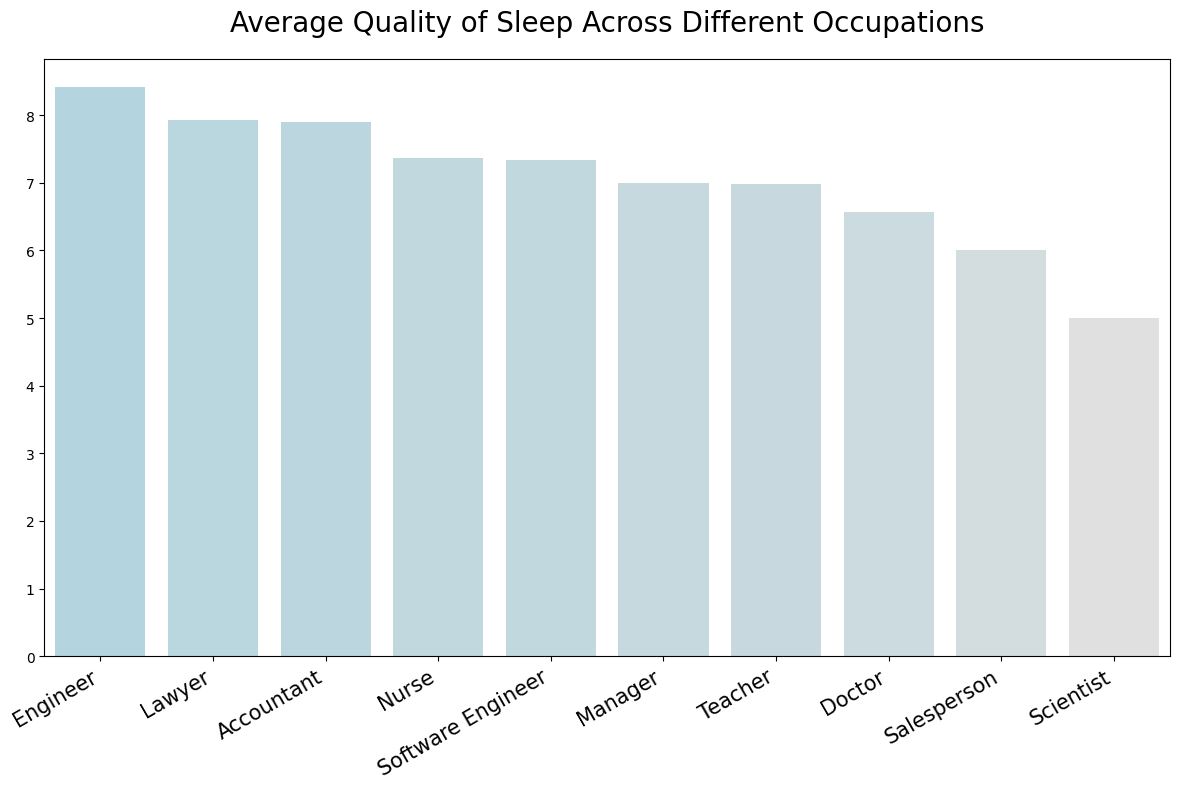

In [ ]:

avg_quality_sleep_by_occupation = df.groupby('Occupation')['Quality of Sleep'].mean().sort_values(ascending=False)


cmap = mcolors.LinearSegmentedColormap.from_list("gradation", ['#e0e0e0', '#add8e6'])


norm = mcolors.Normalize(vmin=min(avg_quality_sleep_by_occupation.values), vmax=max(avg_quality_sleep_by_occupation.values))


bar_colors = [cmap(norm(value)) for value in avg_quality_sleep_by_occupation.values]


plt.figure(figsize=(12, 8))
sns.barplot(x=avg_quality_sleep_by_occupation.index, y=avg_quality_sleep_by_occupation.values, palette=bar_colors)
plt.title('Average Quality of Sleep Across Different Occupations', fontsize=20, pad=20)
plt.xticks(rotation=30, ha='right', fontsize=15)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

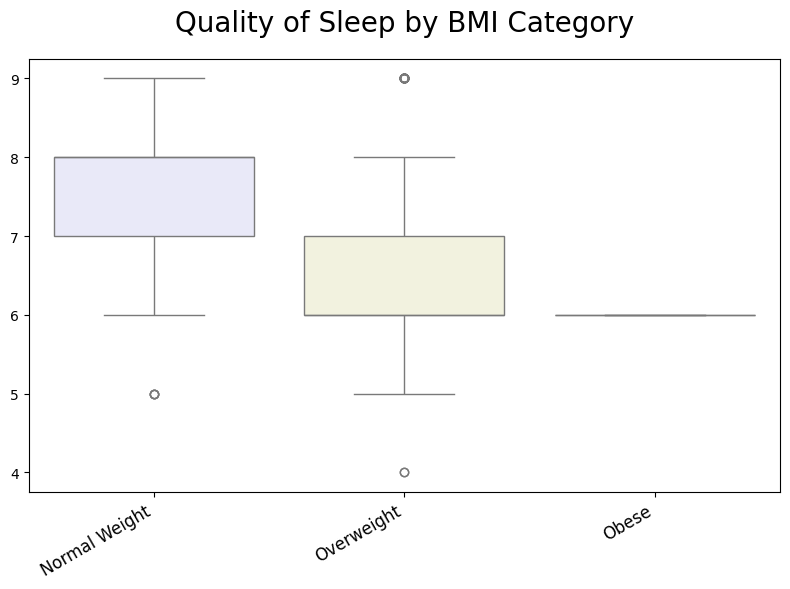

In [ ]:
bmi_order = ['Normal Weight', 'Overweight', 'Obese']
colors = ['#e6e6fa', '#f5f5dc', '#add8e6']

plt.figure(figsize=(8, 6))
sns.boxplot(x='BMI Category', y='Quality of Sleep', data=df, order=bmi_order, palette=colors)
plt.title('Quality of Sleep by BMI Category', fontsize=20, pad=20)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

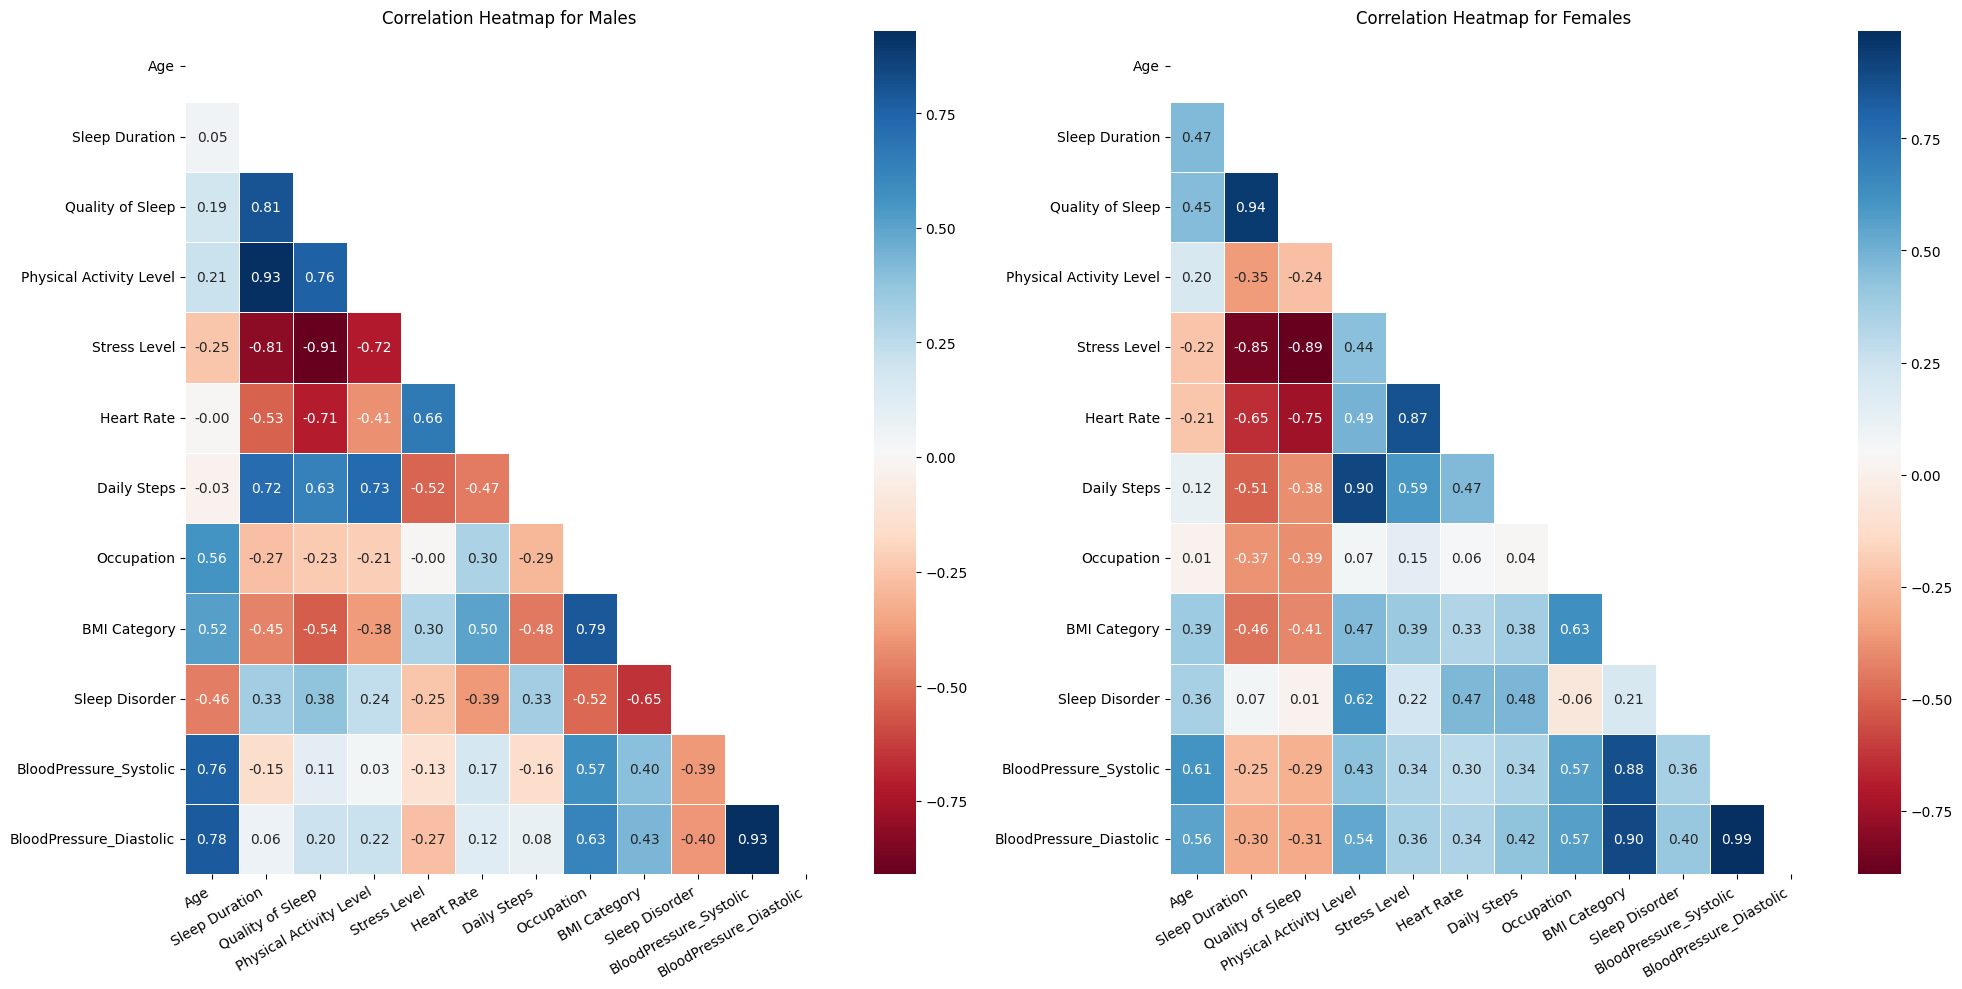

In [ ]:

male_df = numerical_df[numerical_df['Gender'] == 1][['Age','Sleep Duration', 'Quality of Sleep',
                                                     'Physical Activity Level', 'Stress Level', 'Heart Rate',
                                                     'Daily Steps','Occupation','BMI Category','Sleep Disorder',
                                                     'BloodPressure_Systolic', 'BloodPressure_Diastolic']]
female_df = numerical_df[numerical_df['Gender'] == 0][['Age','Sleep Duration', 'Quality of Sleep',
                                                     'Physical Activity Level', 'Stress Level', 'Heart Rate',
                                                     'Daily Steps','Occupation','BMI Category','Sleep Disorder',
                                                     'BloodPressure_Systolic', 'BloodPressure_Diastolic']]


correlation_matrix_male = male_df.corr()
correlation_matrix_female = female_df.corr()


mask = np.triu(np.ones_like(correlation_matrix_male, dtype=bool))


plt.figure(figsize=(20, 10))


plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_male, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap for Males')
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)


plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_female, annot=True, cmap='RdBu', fmt='.2f', linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap for Females')
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

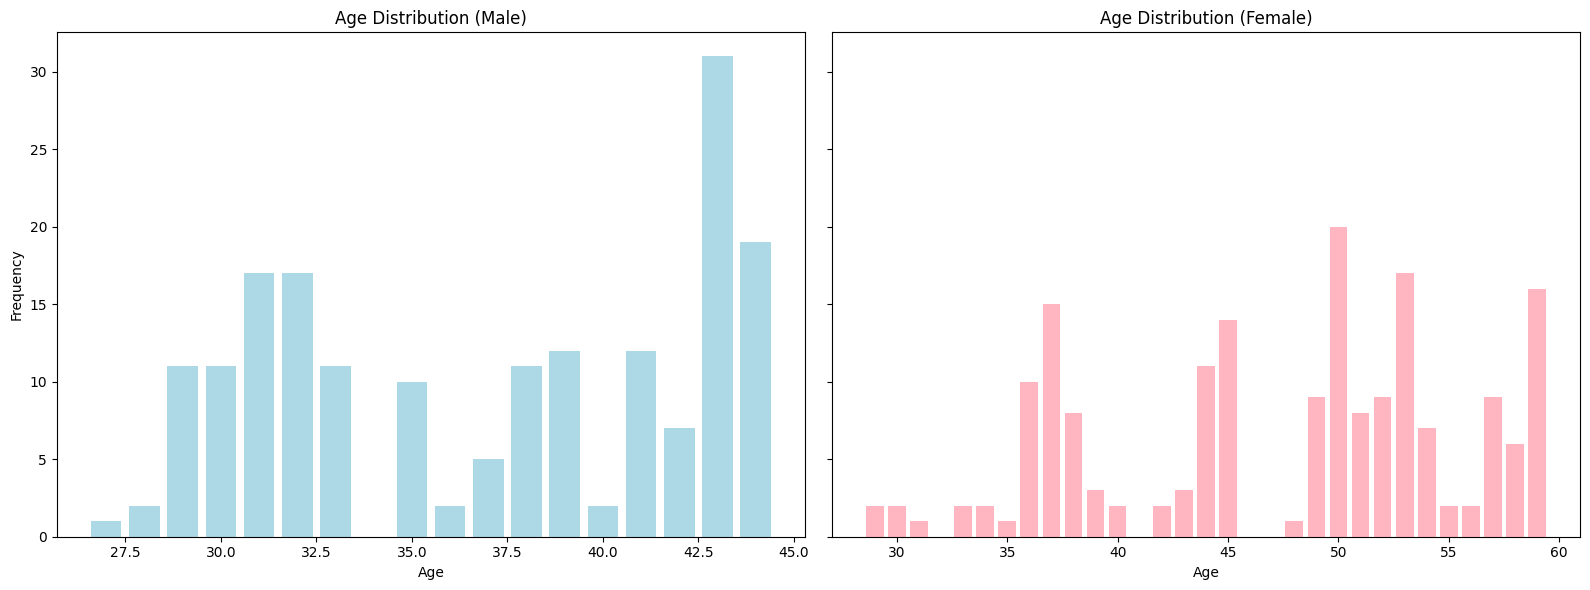

In [ ]:
# Bar chart for age distribution by gender
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Male age distribution
male_age_distribution = df[df['Gender'] == 'Male']['Age'].value_counts().sort_index()
axes[0].bar(male_age_distribution.index, male_age_distribution.values, color='lightblue')
axes[0].set_title('Age Distribution (Male)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Female age distribution
female_age_distribution = df[df['Gender'] == 'Female']['Age'].value_counts().sort_index()
axes[1].bar(female_age_distribution.index, female_age_distribution.values, color='lightpink')
axes[1].set_title('Age Distribution (Female)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


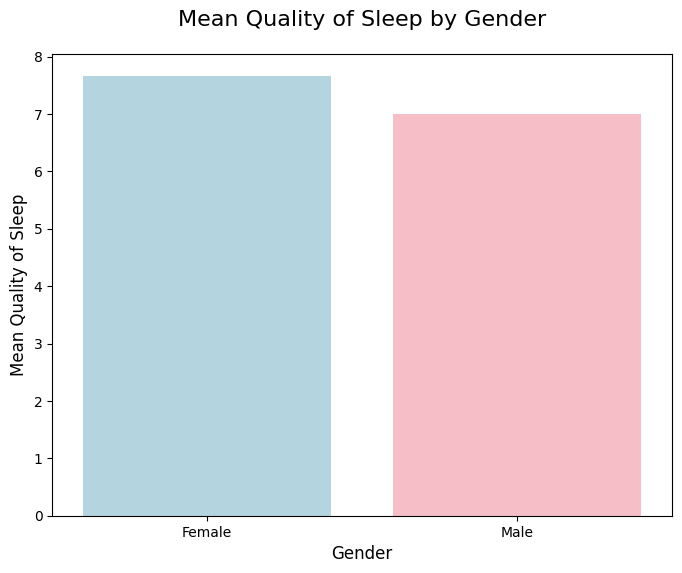

In [ ]:

plt.figure(figsize=(8, 6))

mean_quality_of_sleep = df.groupby('Gender')['Quality of Sleep'].mean().reset_index()

sns.barplot(x='Gender', y='Quality of Sleep', data=mean_quality_of_sleep, palette=['lightblue', 'lightpink'])

plt.title('Mean Quality of Sleep by Gender', fontsize=16, pad=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean Quality of Sleep', fontsize=12)
plt.show()


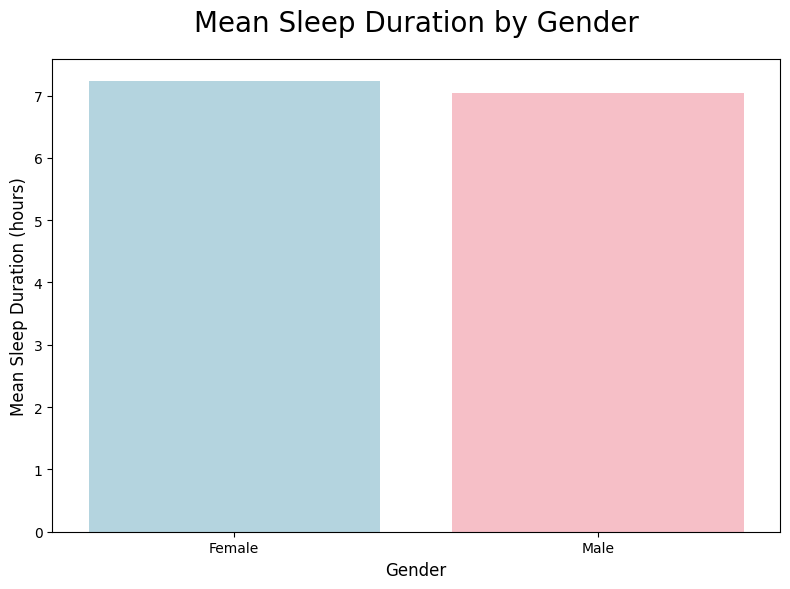

In [ ]:
mean_sleep_duration = df.groupby('Gender')['Sleep Duration'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Sleep Duration', data=mean_sleep_duration, palette=['lightblue', 'lightpink'])

plt.title('Mean Sleep Duration by Gender', fontsize=20, pad=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Mean Sleep Duration (hours)', fontsize=12)

plt.tight_layout()
plt.show()

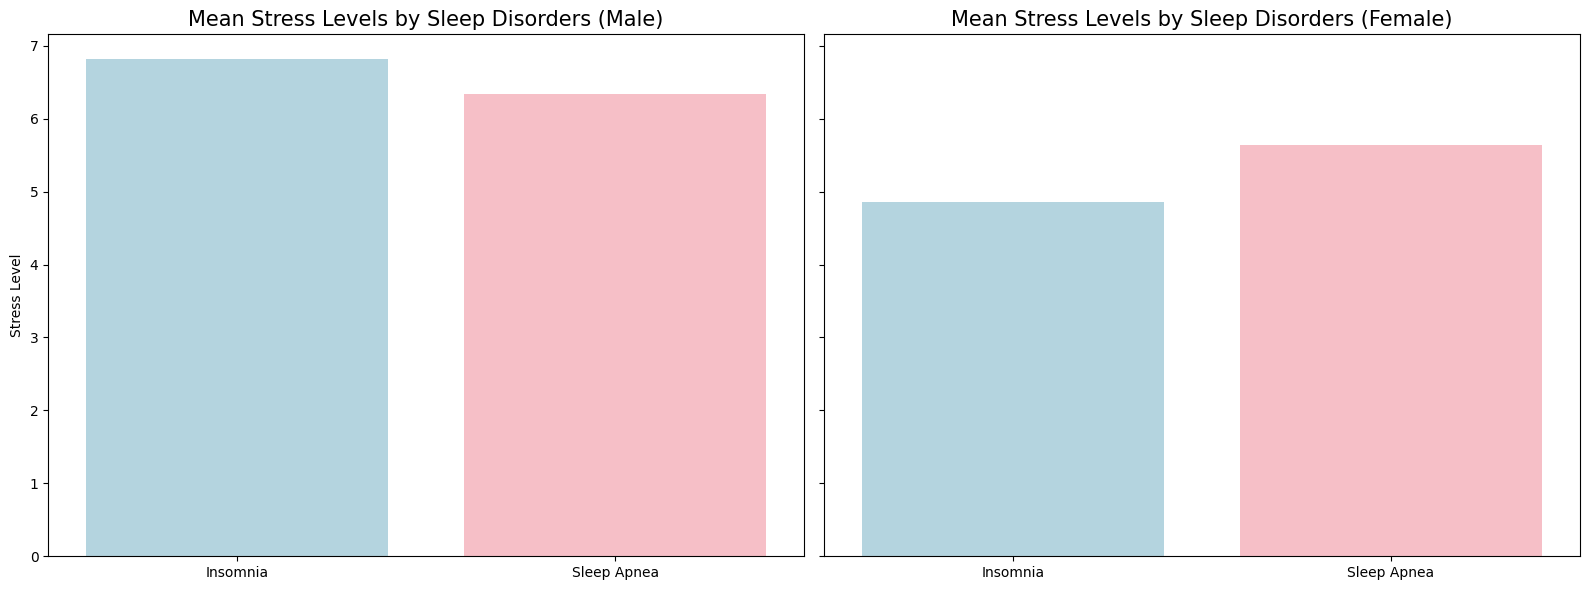

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df_filtered = df[df['Sleep Disorder'] != 'None']

mean_stress_level = df_filtered.groupby(['Gender', 'Sleep Disorder'])['Stress Level'].mean().reset_index()


disorder_order = ['Insomnia', 'Sleep Apnea']


color_palette = ['lightblue', 'lightpink']


fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Male plot
sns.barplot(ax=axes[0], data=mean_stress_level[mean_stress_level['Gender'] == 'Male'],
            x='Sleep Disorder', y='Stress Level', order=disorder_order, palette=color_palette)
axes[0].set_title('Mean Stress Levels by Sleep Disorders (Male)', fontsize=15)
axes[0].set_xlabel('')
axes[0].set_ylabel('Stress Level')

# Female plot
sns.barplot(ax=axes[1], data=mean_stress_level[mean_stress_level['Gender'] == 'Female'],
            x='Sleep Disorder', y='Stress Level', order=disorder_order, palette=color_palette)
axes[1].set_title('Mean Stress Levels by Sleep Disorders (Female)', fontsize=15)
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()
